<a href="https://colab.research.google.com/github/pawel0508/MachineLearning_UcznieNienadzorowane/blob/main/Time_Series_Anomaly_Detection_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade fbprophet

Requirement already up-to-date: fbprophet in /usr/local/lib/python3.6/dist-packages (0.7.1)


In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import fbprophet

np.random.seed(41)
fbprophet.__version__

'0.7.1'

Załadowanie danych

In [39]:
df = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/traffic.csv', 
                 parse_dates=['timestamp'])
df.head()

,timestamp,count
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917
3,2018-09-25 14:04:00,177.798
4,2018-09-25 14:05:00,165.469


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  14398 non-null  datetime64[ns]
 1   count      14398 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 225.1 KB


Wizualizacja danych

In [41]:
px.line(data_frame = df, x = 'timestamp', y = 'count', template='simple_white',
        title='Anomaly Detection - web traffic', width=950, height=500, 
        color_discrete_sequence = ['black'])

In [42]:
px.scatter(data_frame = df, x = 'timestamp', y = 'count', template='simple_white',
        title='Anomaly Detection - web traffic', width=950, height=500, 
        color_discrete_sequence = ['black'])

Przygotowanie danych 


In [43]:
data = df.copy()
data.columns = ['ds', 'y']

In [44]:
data.head()

,ds,y
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917
3,2018-09-25 14:04:00,177.798
4,2018-09-25 14:05:00,165.469



Danymi wejściowymi do klasy Prophet jest obiekt DataFrame biblioteki pandas. Wejściowy DataFrame składa się z dwóch kolumn:

- ds (datestamp, odpowiednio sformatowana kolumna, np. YYYY-MM-DD dla daty, YYYY-MM-DD HH:MM:SS dla dokładnego czasu )
- y (kolumna numeryczna, reprezentująca wartość, którą chcemy przewidywać)

Prophet budowa modelu

In [45]:
from fbprophet import Prophet
model = Prophet(daily_seasonality = True, yearly_seasonality = False, weekly_seasonality = False, 
                interval_width = 0.99, changepoint_range = 0.8)

model.fit(data)
forecast = model.predict(data)

In [46]:
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-25 14:01:00,111.600106,133.969860,191.463632,111.600106,111.600106,48.864424,48.864424,48.864424,48.864424,48.864424,48.864424,0.0,0.0,0.0,160.464530
1,2018-09-25 14:02:00,111.601392,131.796878,189.370553,111.601392,111.601392,48.929051,48.929051,48.929051,48.929051,48.929051,48.929051,0.0,0.0,0.0,160.530443
2,2018-09-25 14:03:00,111.602678,132.585317,189.877629,111.602678,111.602678,48.990147,48.990147,48.990147,48.990147,48.990147,48.990147,0.0,0.0,0.0,160.592825


In [47]:
forecast[['trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

,trend,yhat,yhat_lower,yhat_upper
0,111.600106,160.464530,133.969860,191.463632
1,111.601392,160.530443,131.796878,189.370553
2,111.602678,160.592825,132.585317,189.877629


In [48]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1

In [49]:
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,real,anomaly
0,2018-09-25 14:01:00,111.600106,133.969860,191.463632,111.600106,111.600106,48.864424,48.864424,48.864424,48.864424,48.864424,48.864424,0.0,0.0,0.0,160.464530,182.478,1
1,2018-09-25 14:02:00,111.601392,131.796878,189.370553,111.601392,111.601392,48.929051,48.929051,48.929051,48.929051,48.929051,48.929051,0.0,0.0,0.0,160.530443,176.231,1
2,2018-09-25 14:03:00,111.602678,132.585317,189.877629,111.602678,111.602678,48.990147,48.990147,48.990147,48.990147,48.990147,48.990147,0.0,0.0,0.0,160.592825,183.917,1


In [50]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Reds', 
           title='Anomaly Detection in Time Series', template='plotly_dark', width=950, height=500)

In [51]:
future = model.make_future_dataframe(periods = 1440, freq = 'Min')
future

,ds
0,2018-09-25 14:01:00
1,2018-09-25 14:02:00
2,2018-09-25 14:03:00
3,2018-09-25 14:04:00
4,2018-09-25 14:05:00
...,...
15833,2018-10-06 13:54:00
15834,2018-10-06 13:55:00
15835,2018-10-06 13:56:00
15836,2018-10-06 13:57:00


In [52]:
forecast = model.predict(future)

In [53]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,160.464530,131.819469,190.408847
1,2018-09-25 14:02:00,160.530443,130.397977,190.171251
2,2018-09-25 14:03:00,160.592825,132.272303,187.057702
3,2018-09-25 14:04:00,160.651650,130.626583,191.191963
4,2018-09-25 14:05:00,160.706892,130.150931,189.366250


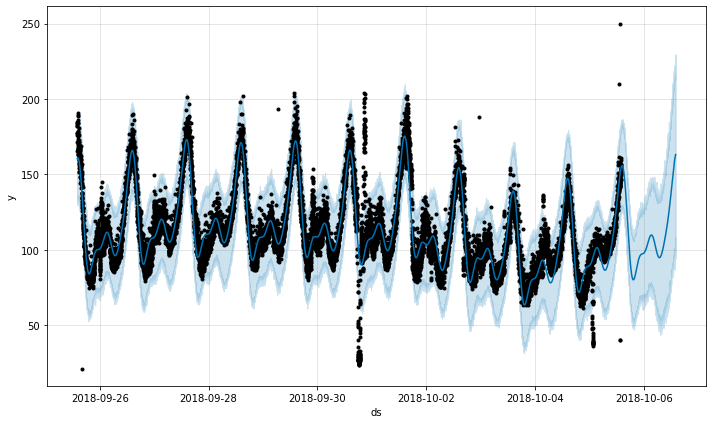

In [55]:
_ = model.plot(forecast)

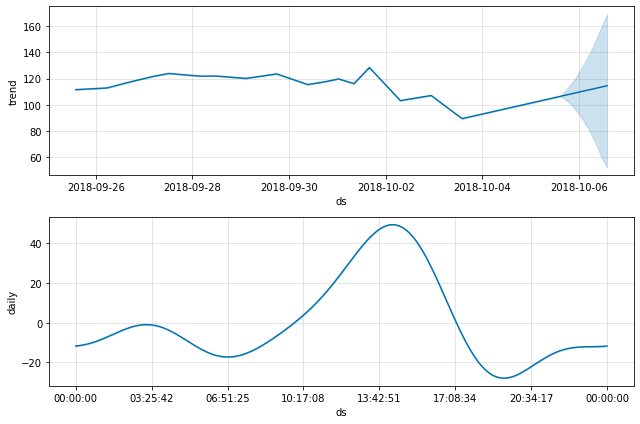

In [56]:
_ = model.plot_components(forecast)

Model wrzesień

In [57]:
df.head()


,timestamp,count
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917
3,2018-09-25 14:04:00,177.798
4,2018-09-25 14:05:00,165.469


In [61]:
data_sep = df[df['timestamp'].dt.month == 9]
data_sep.columns = ['ds', 'y']
data_sep.head()

,ds,y
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917
3,2018-09-25 14:04:00,177.798
4,2018-09-25 14:05:00,165.469


In [75]:
model = Prophet(daily_seasonality = True, yearly_seasonality = False, weekly_seasonality = False, 
                interval_width = 0.99, changepoint_range = 0.8, seasonality_mode = 'multiplicative')

model.fit(data_sep)
forecast = model.predict(data_sep)

forecast['real'] = data_sep['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1

In [79]:
forecast[forecast['anomaly'] == -1]['ds'].dt.date

124     2018-09-25
630     2018-09-26
631     2018-09-26
640     2018-09-26
645     2018-09-26
           ...    
7621    2018-09-30
7622    2018-09-30
7623    2018-09-30
7624    2018-09-30
7625    2018-09-30
Name: ds, Length: 147, dtype: object

In [63]:

px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl', 
           title='Anomaly Detection in Time Series - September', template='plotly_dark', width=950, height=500)

In [64]:
future = model.make_future_dataframe(periods=1440, freq = 'Min')
future

,ds
0,2018-09-25 14:01:00
1,2018-09-25 14:02:00
2,2018-09-25 14:03:00
3,2018-09-25 14:04:00
4,2018-09-25 14:05:00
...,...
9234,2018-10-01 23:55:00
9235,2018-10-01 23:56:00
9236,2018-10-01 23:57:00
9237,2018-10-01 23:58:00


In [65]:
forecast = model.predict(future)

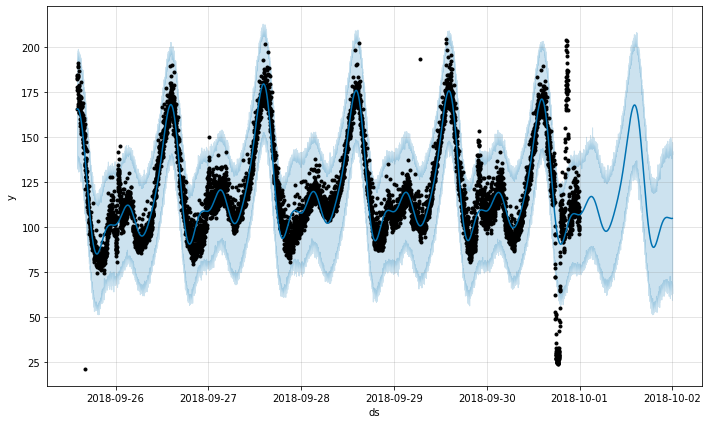

In [66]:
_ = model.plot(forecast)

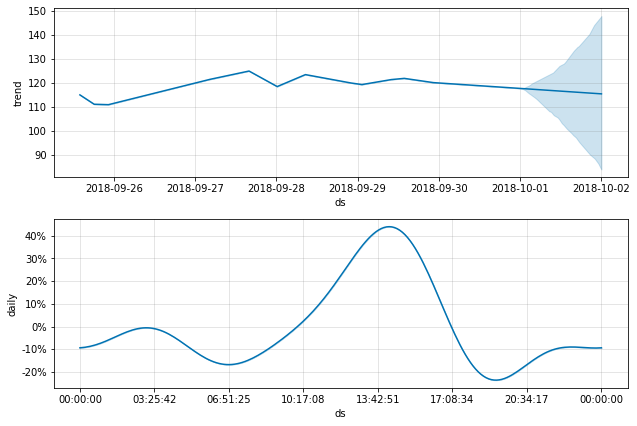

In [67]:
_ = model.plot_components(forecast)

In [72]:
from fbprophet.plot import plot_plotly
plot_plotly(model, forecast, xlabel='Czas', ylabel='Ruch webowy')

In [ ]:
|